## General comments about notebook assignments

When you submit a notebook, you must make sure that 

- **all cells are executed without any errors** (you will lose points for **any** errors that prevent the entire notebook from being executed) 
- all lines that say "do not modify this line" are **not** modified
- all cells that say "do not modify this cell" are **not** modified
- you execute every cell that says "Do execute this cell"

You can add your own cells to the notebook, but make sure that
- **none of the cells you add yourself** have commented headings saying
    - \# Printout cell ...
    - \# Code cell ...
    - \# Execution cell
    - \# Literal assignment cell ...
- you **do not** insert any cells in between a code cell where I tell you to assign a value to a specific variable and a printout cell where the value of that variable is printed out

## Prerequisites for this assignment

To complete this assignment you will need to know

- how to use matrices and column vectors to represent systems of $n$ linear equations in $n$ unknowns the form:

$$ Ax = b $$

where $A$ is a given $n \times n$ matrix, $x$ is an $n \times 1$ column vector of unknowns, and $b$ is a given $n \times 1$ column vector.

And in Python:

- how to construct a matrix as 2-d numpy arrays
- how to construct a column vector as an $n\times 1$ 1-d numpy array

This is covered in a Jupyter notebook entiled "NumpyIntro" which you are strongly encouraged to review.

**Literal Assignments**

Finally, you should understand what a literal assignment is. In assignments throughout the course, you will be asked to provide **literal assignments** to variables with specified names. Failure to understand this concept is guaranteed to lead to lost points. **You have been warned!!!**

A **literal assignment** is an assignment of the form:

    variable = literal expression

in which the right hand side is a literal expression, i.e. an expression that does not involve

- functions/methods
- operations (like +, -, *, /, ** etc.)
- reading from a file or a database
- variables

So here are some examples of **non-literal** assignments:

x = math.sqrt(5)

y=x+45

z=76.*51/23

w="hot"+"dog"

For our purposes, these are examples of literal assignments

w="dog"

x=53

q=-27

y=True

z=98.6

a=-98.6

**Assignment cells**

In some cells I will ask you for an assignment instead of a literal assignment. In such a case, the rules for what can 
appear on the right hand side are looser: functions, variables from previous cells, operations on those variables, etc..

When you do this, **it is your responsibility to make sure when the cells in the notebookd are executed in order** the correct assignment is made.

**Using numpy to solve a systems of linear equations**

If $A$ is an $n \times n$ numpy array and $b$ is and $n\times 1$ numpy array, we can solve the system $Ax=b$ as in the following example.

In [1]:
import numpy as np
A=np.array([[1.,2.],[3.,5.]])
print(A)
print("\n")
b=np.array([[7],[2]])
print(b)
print("\n")
x=np.linalg.solve(A,b)
print(x)

[[1. 2.]
 [3. 5.]]


[[7]
 [2]]


[[-31.]
 [ 19.]]


To check that this is correct we can explicitly compute $Ax.$

In [2]:
np.matmul(A,x)

array([[7.],
       [2.]])

## Resistor Networks

In this assignment, we introduce numpy and solve some linear algebra problems that arise when analyzing a particular type of electrical circuit, referred to as a *resistor network* using numpy, our go-to package for doing numerical linear algebra calculations.

Everything you need to know much about electricity will be introduced in this notebook. Before talking about resistor networks, we need the notion of a *directed graph*. 

**Definition.** A *directed graph* consists of a finite collection $N$ of *nodes* and $E$ of *directed edges*, which are ordered pairs connnecting distinct pairs of vertices. 
We assume that there is only one edge connecting any pair of nodes, and we do not allow an edge connecting a node to itself.

For an edge $E=(i,j)$ connecting node $i$ to node $j$ we refer to the edge as an *outgoing* edge at node $i$ and an *incoming* edge at node $j.$ 

**Example 1.** Consider the case where $N=\{ 1,2,3,4\}$ 
and $E = \{ (1,2), (1,3), (2,4), (2,3)\}.$


It is customary to use a figure to describe a directed graph. In the example, such a figure can look like this:

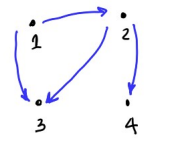

**Figure 1.** Depiction of the directed graph example. Here, node 2 has 1 incoming edge and 2 outgoing edges.

    
**Definition.** A *resistor network* is a directed graph in which each edge is assigned a *resistance*, measured in *ohms.*


**Example revisited.** In the directed graph example, assume the resistances along the edges are
$R_{1,2} = 3$ ohms,
$R_{1,3} = 5$ ohms,
$R_{2,4} = 1$ ohm, and
$R_{2,3} = 2$ ohms.
The resulting resistance network is as shown in Figure 2. Note that resistors are usually depicted using a zig-zag line segment. 

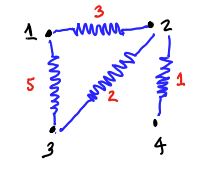

**Figure 2.** Depiction of the resistor network.

**Definition.** The *current* along a directed edge in a resistor network measured in *amperes* (or *amps* for short) refers to the rate at which electric charge flows along that edge. 

Note that the edge has a direction and flow can move in any direction. If the flow is in the direction of the edge, we have positive current and if flow is in the opposite direction we have negative current.

**Definition.** A *battery* is a device that has two terminals (a positive and a negative side) and a voltage value measured in *volts*. When we connect each terminal to a pair of nodes in the network, you can think of the result being that charge is pumped into the network where the positive terminal of the battery is connected and out of the network where the negative terminal is connected.

In fact, it is *electrons* that actually flow from the negative terminal to the positive terminal, but 
since they carry a negative charge, we take the point of view that there is a positive flow in the other direction.

**Special Case.** When our resistor network consists of a single resistor whose resistance is $R$ ohms, if we connect a $V$ volt battery to it (see Figure 3) the current $I$ passing through the resistor satisfies Ohm's law:
$$
I = V/R.
$$



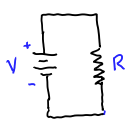

**Figure 3.** Simple resistor network with a battery connected.


**Note.** A resistor can be thought of as a component  with the property that when a voltage at  
both ends of the component takes some constant value $V$, 
then current $I$ passing through the component is also constant. Then the *resistance* of the component is 
the ratio $V/I.$

**Analyzing a Resistor Network.** 
When we connect a battery with known voltage, to a resistor network with known resistences,  current (possibly zero) flows at a constant rate from the positive to the negative side of the battery. **The current flowing from any node to any other node in the network does not vary over time.**  

In particular, the current flowing through every resistor does not vary. 
However, the amount current can differ from one resistor to another. 
We want to answer the following questions about our circuit: 

- **how much current flows through each resistor?**

- **how much current flows from the positive to the negative terminal of the battery?**


To answer this question, we need two key ideas:

- Conservation of current at each node

and

- Voltage at each node.



**Conservation of Current.** When we connect a battery to a resistor network, the current that flows through the network satisfies a conservation law. At every node, the rate of flow into that node must be balanced by the rate of flow out of that node. (Think of current as behaving like water.)

Consider a node with edges $E_1,E_2,E_3,E_4,$ and $E_5$ as in Figure 4. 

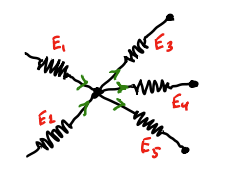

**Figure 4.** Node with 2 incoming edges and 3 outgoing edges.

Observe that edges are **directed.** Current that moves in the direction of the edge will get a positive sign, and current moving in the opposite direction will get a negative sign. If we let $I(E)$ denote the current along an edge $E,$ then conservation of current requires that

$$
I(E_1)+ I(E_2)=I(E_3)+I(E_4)+I(E_5).
$$

More generally, if conservation of current at a node $n$ that is not connected to a battery satisfies

$$
\sum_{\mbox{E incoming at n}} I(E)= 
\sum_{\mbox{E outgoing at n}} I(E).
$$

As mentioned above, it is assumed that some current flows from the positive terminal of the battery and the same current flows into the negative terminal. In other words the positive terminal is a *source* of current and the negative terminal is a *sink* of current. 
By conservation of current, the magnitude $I^*$ of the source current must be the same as the magnitude $I^*$ of the sink current, and we need to modify the conservation equation for a node $n$ connected to the positive side of battery to say that

$$
I^*+\sum_{\mbox{E incoming at n}} I(E)  =
\sum_{\mbox{E outgoing at n}} I(E).
$$

and if the node is connected to the negative side of the battery

$$
\sum_{\mbox{E incoming at n}} I(E)  = I^*+
\sum_{\mbox{E outgoing at n}} I(E)
$$

**Voltages**

Another key assumption is that every node $n$ can be assigned a *voltage* $V_n$ with the following rules:

a) the voltage at the node connected to the battery's negative terminal is 0

b) the voltage at the node connected to the battery's positive terminal is $V,$ the voltage of the battery,

c) for every edge in the network i.e. for every resistor with resistance $R$ connecting node $n$ to node $n',$ the current $I$ across the resistor satisfies Ohm's law:

$$
I = (V_{n}-V_{n'})/R.
$$

or stated alternatively

$$
\Delta V = IR.
$$

where $\Delta V = V_{in}-V_{out}$

The units for Ohm's law: when voltages are measured in Volts, currents  in Amperes (amp for short), and resistences in Ohms, 1 Volt across a 1 Ohm resistor produces 1 amp of current.

You can think of the voltage at a node as *elevation* so that current, like water, flows from higher to lower elevation. 

With these considerations in mind, given a battery with known voltage connected to two nodes in a resistor network, we can determine the current through every resistor and the voltage assigned at every node by solving a system of linear equations.

**Example. Two resistors in parallel.**

Consider the circuit shown in Figure 4, consisting of a battery with known voltage $V$ and a pair of resistors 
in parallel, along edges we can lable $E_1$ and $E_2$ with known resistences $R_1$ and $R_2$ connecting
nodes $n$ and $n'.$ To 
proceed we need to give directions to our edges determine the currents. We take these to be left to right as indicated with the arrows shown in green. 

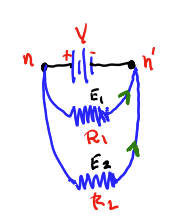

**Figure 5.** Two resistors in parallel.

In this case, 

a) tells us that the voltage at node $n'$ is $0$ 

b) tells us the voltahe at node $n$ is $V.$

c) tells us that the current $I_1$ along edge $E_1$ (through resistor $R_1$) satisfies 

$$
I_1 = (V-0)/R_1 = V/R_1,
$$

and similarly the current $I_2$ along edge $E_2$ (through resistor $R_2$) is given by 

$$
I_2 = V/R_2.
$$

The total current $I$ from node $n$ to $n'$ is the sum of
the two currents

$$
I = V/R_1 + V/R_2 = V \left\{ \frac{1}{R_1} + \frac{1}{R_2} \right\}
$$

Observe, by Ohm's law, this is the same we would obtain if we replaced the two resistors by a single resistor with resistence
$$
R = \frac{1}{\frac{1}{R_1} + \frac{1}{R_2}}.
$$
This expression is referred to as the *harmonic mean* of
$R_1$ and $R_2.$

We say that the *effective resistence* of two resistors in parallel is the harmonic mean of their resistences.

**Exercise (not to be turned in)** What is the effective resistance of a network with two nodes, $n$ and $n'$ with $k$ resistors in parallel with resistences
$R_1,R_2,\ldots,R_k.$

**Example. Two resistors in series.** Next consider the circuit in Figure 6 with two  resistors in series?

Here we can ask for the voltage at every node and the total current passing from the positive to the negative side of the battery. 
(Here the current is the same in each resistor by conservation of current.)

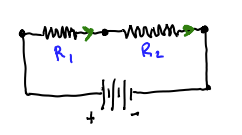

**Figure 6.** Two resistors in series.

Assuming the voltage of the battery is $V$, we have an unknown current $I$ and an unknown voltage $V'$ at the node where the two resistors are connected.

Using our assumptions we can label the voltages at the nodes as in Figure 7.

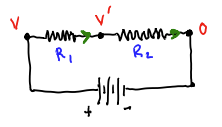

**Figure 7.** Voltages for the 2 resistors in series circuit.

We have two unknowns to determine $I$ and $V'.$ They satisfy the following equations:

- $I=(V-V')/R_1$
- $I=(V'-0)/R_2 = V'/R_2$

Equating the two right hand sides and muliplying both sides by $R_1R_2$ we see that

$$
R_2 (V-V') = R_1 V'
$$

giving

$$
V' = \frac{R_2}{R_1+R_2} V,
$$

and 

$$
I = V'/R_2 = \frac{1}{R_1+R_2} V
$$

So the combination of resistors produces a current that is the same as that of single resistor with resistance $R_1+R_2.$

The effective resistance of a series circuit with two resistors is the sum of their resistances.


**More complex networks**

Next consider the network shown in Figure 8 with 7 resistors, 6 nodes labeled A,B,C,D,E and F. The directions of the edges are indicated in green.

We can define a voltage at each node
$V_A,V_B,\ldots,V_F,$ and a current 
$I_1,I_2,\ldots,I_7$ through each resistor.

Letting the battery voltage be 1 volt, denoted so we have $V_A=1$ and $V_F=0.$
In addition, there is a current $I^*$ entering node A from the battery and leaving node F to the battery.


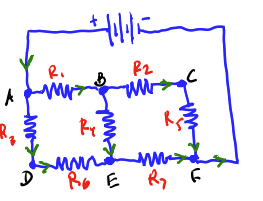

**Figure 8.** Resistor network to analyze.

Assuming resistances are given by $R_i=i$ Ohms for $i=1,2,\ldots,7$ and the battery voltage is 1, write down 

- a current conservation equation for every one of the 6 nodes

- a $\Delta V = IR$ equation for every resistor.

In Problems 1 and 2, you are asked to construct the $13 \times 12$ matrix $A$ and the $13 \times 1$ column vector $b$ as numpy arrays so that these equations can be 
written in matrix form:

$$
A x = b
$$

where $x$ is $12 \times 1$ column vector of the 12 unknowns using the following ordering:

$I^*,I_1,I_2,I_3,I_4,I_5,I_6,I_7,V_B,V_C,V_D,V_E.$

and where the rows (equations) in the matrix are ordered using

- Ohm's law along resistor $I_1$
- Ohm's law along resistor $I_2$
- Ohm's law along resistor $I_3$
- Ohm's law along resistor $I_4$
- Ohm's law along resistor $I_5$
- Ohm's law along resistor $I_6$
- Ohm's law along resistor $I_7$
- Conservation of current at node $A$
- Conservation of current at node $B$
- Conservation of current at node $C$
- Conservation of current at node $D$
- Conservation of current at node $E$
- Conservation of current at node $F$

**Execute the following cell** so that you can use the numpy library abbreviated as np.

In [3]:
# Execution cell - do not modify this cell
# Do execute it
import numpy as np

**Problem 1 (10 points)**

Use the following cell to put your code for creating the $13 \times 12$ matrix A for Problem 1. **Make sure you assign the matrix to a variable called A**.

Your code should be completely self-contained.

In [4]:
# Code cell for Problem 1 - do not delete or modify this line
A = np.array([[0,1,0,0,0,0,0,0,1,0,0,0],[0,0,2,0,0,0,0,0,-1,1,0,0],[0,0,0,3,0,0,0,0,0,0,1,0],[0,0,0,0,4,0,0,0,-1,0,0,1],[0,0,0,0,0,5,0,0,0,-1,0,0],[0,0,0,0,0,0,6,0,0,0,-1,1],[0,0,0,0,0,0,0,7,0,0,0,-1],[-1,1,0,1,0,0,0,0,0,0,0,0],[0,-1,1,0,1,0,0,0,0,0,0,0],[0,0,-1,0,0,1,0,0,0,0,0,0],[0,0,0,-1,0,0,1,0,0,0,0,0],[0,0,0,0,-1,0,-1,1,0,0,0,0],[1,0,0,0,0,-1,0,-1,0,0,0,0]])

In [5]:
# Printout cell for Problem 1 - do not delete or modify this cell
# Do execute this cell
print(A)
print(A.shape)

[[ 0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0 -1  1  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  4  0  0  0 -1  0  0  1]
 [ 0  0  0  0  0  5  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  6  0  0  0 -1  1]
 [ 0  0  0  0  0  0  0  7  0  0  0 -1]
 [-1  1  0  1  0  0  0  0  0  0  0  0]
 [ 0 -1  1  0  1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 -1  0 -1  1  0  0  0  0]
 [ 1  0  0  0  0 -1  0 -1  0  0  0  0]]
(13, 12)


**Problem 2 (10 points)**

Use the following cell to put your code for creating the (column) matrix $b.$ **Make sure
the name you use for matrix is b.**

Your code should be completely self-contained.

In [6]:
# Code cell for Problem 2 - do not delete or modify this line
b = np.array([[1],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

In [7]:
# Printout cell for Problem 2 - do not delete or modify this cell
# Do execute this cell
print(b)
print(b.shape)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
(13, 1)


**Solving the system**

Maybe you are wondering what happens if $A$ is not a square matrix and we want to solve $Ax=b$ using the np.linalg.solve function. It produces an error (**but don't check in this notebook** because I want you to turn in notebooks that are free of errors).

The problem with our system is that there is an equation that is redundant i.e. it's validity is a consequence of the other equations. 

**Problem 3 (10 points)** Find an equation (row of A) and corresponding row of b that is redundant. 

Use the following cell to specify a row number of $A$ that can be eliminated. In the following literal assignment cell assign a literal value to the variable called **row_number** in the following cell. Make sure to use 0,1,...,12 numbering of the rows.

In [8]:
# Literal assignment cell for Problem 3 - do not delete or modify this row
row_number = 13

In [9]:
# Printout cell for Problem 3 - do not modify this cell
# Do execute it.
print(row_number)

13


**Problem 4 (5 points)** Create a new version of A, called Anew that has the row in Problem 3 removed. (There is an easy way to do this using the previously created matrix A).
Use the following cell for your code for creating Anew.

In [10]:
# Code cell for Problem 4 - do not modify this line
Anew = A[:-1]

In [11]:
# Printout cell for Problem 4 - do not modify this cell
# Do execute it.
print(Anew)
print(Anew.shape)

[[ 0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0 -1  1  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  4  0  0  0 -1  0  0  1]
 [ 0  0  0  0  0  5  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  6  0  0  0 -1  1]
 [ 0  0  0  0  0  0  0  7  0  0  0 -1]
 [-1  1  0  1  0  0  0  0  0  0  0  0]
 [ 0 -1  1  0  1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 -1  0 -1  1  0  0  0  0]]
(12, 12)


**Problem 5 (5 points)** Create a new version of b, called bnew that has the row in Problem 3 removed. (There is an easy way to do this using the previously created column b).
Use the following cell for your code for creating bnew.

In [12]:
# Code cell for Problem 5 - do not modify this line
bnew = b[:-1]

In [13]:
# Printout cell for Problem 5 - do not modify this cell
# Do execute it.
print(bnew)
print(bnew.shape)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
(12, 1)


**Problem 6 (5 points)** Find the solution of the modified system of equations with 12 equations and 12 unknowns. Use the following cell to calculate your solution for $x.$
**Make sure you assign the solution to the variable called x.**

In [14]:
# Code cell for Problem 6 - do not modify this line
x=np.linalg.solve(Anew,bnew)

In [15]:
# Printout cell for Problem 6 - do not modify this cell.
# Do execute it.
print(x)

[[0.20921986]
 [0.16843972]
 [0.11879433]
 [0.04078014]
 [0.04964539]
 [0.11879433]
 [0.04078014]
 [0.09042553]
 [0.83156028]
 [0.59397163]
 [0.87765957]
 [0.63297872]]


**Problem 7 (5 points)** What is the current $I^*$?

Use the following assignment cell (not necessarily literal) to assign a value to the variable **Istar**.

In [16]:
# Assignment cell for Problem 7 - do not modify or delete this line
Istar = x[0]

In [17]:
# Printout cell for Problem 7 - do not modify this cell 
# Do execute it.
print(Istar)

[0.20921986]


**Problem 8 (5 points)** What is the effective resistance of the network?

In the following cell assign the correct effecrive resistence to a variable called **effective_resistence**.

In [18]:
# Assignment cell for Problem 8 - do not modify or delete this line
effective_resistence = 1 / Istar

In [19]:
# Printout cell for problem 8 - do not modify this cell
# Do execute it
print(effective_resistence)

[4.77966102]


## Before turning in this notebook make sure you

- run every cell in the notebook and no errors are produced
- save the notebook

## 